In [144]:
import os,sys,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import util
from tqdm import tqdm
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

one class classification regime<br>
One class SVM <br>
Support Vector Data Descriptor (SVDD) <br>
one class multi max probability machine <br>
dual slope min max <br>
Generalized One-class Discriminative Sub-spaces (GODS) <br>

In [ ]:
### one-class SVM
def one_class_svm(X, nu=0.1, gamma='auto'):
    clf = OneClassSVM(nu=nu, kernel='rbf', gamma=gamma)
    clf.fit(X)
    return clf

In [31]:
df = pd.read_pickle('data/df_rotamer.pkl')
df = df[df['num_NN_atom'] >0] # meaningful binding site data

<Axes: >

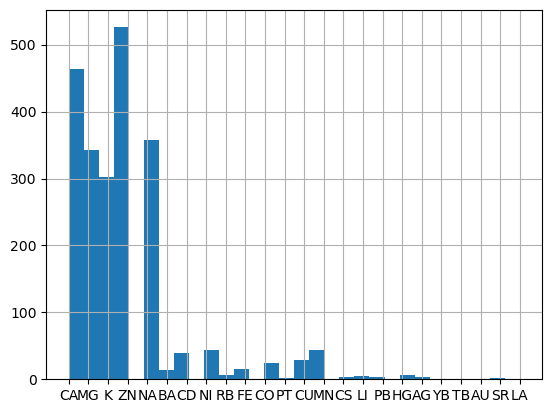

In [315]:
df['metal'].hist(bins=30)

In [325]:
for metal in df['metal'].unique():
    if sum(df['metal']==metal) >= 100:
        print(metal)

CA
MG
K
ZN
NA


In [50]:
# df_CA = df[df['metal']=='CA']
# df_MG = df[df['metal']=='MG']
# df_K = df[df['metal']=='K']
# df_ZN = df[df['metal']=='ZN']


In [327]:
# df_MG[df_MG['num_NN_atom'] >0] #.hist()#['NN_atom_'] #['NN_atom_properties'][0]
# df_K[df_K['num_NN_atom'] >0] #.hist()#['NN_atom_'] #['NN_atom_properties'][0]
# df_ZN[df_ZN['num_NN_atom'] >0] #.hist()#['NN_atom_'] #['NN_atom_properties'][0]

In [52]:
df_CA = df_CA[df_CA['num_NN_atom'] > 0] #.hist()#['NN_atom_'] #['NN_atom_properties'][0]

In [57]:
df_CA_strong = df_CA[df_CA['num_NN_atom'] > 1]

In [90]:
ij=6
df_CA['NN_atom_properties'][ij], df_CA['num_NN_atom'][ij]

({'atom_type': ['O', 'O', 'O', 'O'],
  'l2_d': [2.4859436, 2.4573941, 2.4101844, 2.4119282],
  'van_der_waals_radius': [152.0, 152.0, 152.0, 152.0],
  'electronegativity': [3.44, 3.44, 3.44, 3.44],
  'unshared_electron': [4.0, 4.0, 4.0, 4.0],
  'valency': [6.0, 6.0, 6.0, 6.0]},
 4)

In [79]:
df_CA_strong

,pdb,pdb_id,metal,ion,bound_residue,num_bound_residue,paper_bound_residue,num_paper_bound_residue,num_bound_chain,motif_binding_xyz,num_NN_atom,NN_atom_properties
4,7MCI_1.pdb,7MCI,CA,Ca²⁺,"[D, D, R, E]",4,ARG.ASP.GLU.,3,2,"{'xyz': [[[-1.000e-03 5.978e+00 -3.136e+00], ...",4,"{'atom_type': ['O', 'O', 'O', 'O'], 'l2_d': [2..."
6,8AE1_1.pdb,8AE1,CA,Ca²⁺,"[R, G, G, G, E, G]",6,ARG.GLU.GLY.,3,2,"{'xyz': [[[ 2.682 -1.089 -2.729], [ 2.544 -2.4...",4,"{'atom_type': ['O', 'O', 'O', 'O'], 'l2_d': [2..."
23,5BU8_1.pdb,5BU8,CA,Ca²⁺,"[N, Q]",2,ASN.GLN.,2,1,"{'xyz': [[[-5.032 -1.285 -1.097], [-4.668 -0.0...",2,"{'atom_type': ['O', 'O'], 'l2_d': [2.4455533, ..."
41,6T9N_1.pdb,6T9N,CA,Ca²⁺,"[L, L, L, L]",4,LEU.,1,4,"{'xyz': [[[-3.515 4.859 -0.253], [-2.195 4.2...",4,"{'atom_type': ['O', 'O', 'O', 'O'], 'l2_d': [2..."
55,5DA5_1.pdb,5DA5,CA,Ca²⁺,"[E, E, E, E]",4,GLU.,1,2,"{'xyz': [[[-4.719 -1.158 -4.1 ], [-4.08 -0.7...",4,"{'atom_type': ['O', 'O', 'O', 'O'], 'l2_d': [2..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2220,1LW5_2.pdb,1LW5,CA,Ca²⁺,"[T, T, S, Q]",4,GLN.SER.THR.,3,2,"{'xyz': [[[ 0.193 -1.526 5.262], [ 0.989 -1.5...",5,"{'atom_type': ['O', 'O', 'O', 'O', 'O'], 'l2_d..."
2226,3FG4_1.pdb,3FG4,CA,Ca²⁺,"[E, N]",2,ASN.GLU.,2,2,"{'xyz': [[[-3.75 4.341 0.751], [-3.482 2.9...",2,"{'atom_type': ['O', 'O'], 'l2_d': [2.3205914, ..."
2230,2B00_1.pdb,2B00,CA,Ca²⁺,"[E, S, E]",3,GLU.SER.,2,1,"{'xyz': [[[-5.858 -1.52 0.205], [-4.551 -1.1...",3,"{'atom_type': ['O', 'O', 'O'], 'l2_d': [2.3417..."
2234,1C3H_1.pdb,1C3H,CA,Ca²⁺,"[N, V, D, Q, V, D, Q, Q, N, D]",10,ASN.ASP.GLN.VAL.,4,2,"{'xyz': [[[3.755 0.878 4.795], [2.792 0.666 3....",6,"{'atom_type': ['O', 'O', 'O', 'O', 'O', 'O'], ..."


In [99]:
df_CA_NN_atom_properties = pd.DataFrame(df_CA['NN_atom_properties'])#.apply(lambda x: pd.DataFrame(x))

In [103]:
#max(df_CA['num_NN_atom'])

7

In [297]:
#df_CA_NN_atom_properties#.values[4]

In [116]:
df_CA['NN_atom_properties'][0].keys()

dict_keys(['atom_type', 'l2_d', 'van_der_waals_radius', 'electronegativity', 'unshared_electron', 'valency'])

In [142]:
#one_hot encode all data to a vector of 1x8, 0 if not present, non-0 if present
#dict_keys(['atom_type', 'l2_d', 'van_der_waals_radius', 'electronegativity', 'unshared_electron', 'valency'])
df_properties = {'pdb':[], 'pdb_id':[], 'NN_atoms':[], 'l2d':[], 'van_der_waals_radius':[], 'electronegativity':[], 'unshared_electron':[], 'valency':[]}
for i in range(len(df_CA)):
    NN_atoms = np.zeros(8)
    l2d = np.zeros(8)
    van_der_waals_radius = np.zeros(8)
    electronegativity = np.zeros(8)
    unshared_electron = np.zeros(8)
    valency = np.zeros(8)
    for j in range(df_CA['num_NN_atom'].values[i]):
            NN_atoms_val = len(df_CA['NN_atom_properties'].values[i]['atom_type'])
            NN_atoms[:NN_atoms_val] = 1
            l2d_val = df_CA['NN_atom_properties'].values[i]['l2_d']
            van_der_waals_radius_val = df_CA['NN_atom_properties'].values[i]['van_der_waals_radius']
            electronegativity_val = df_CA['NN_atom_properties'].values[i]['electronegativity']
            unshared_electron_val = df_CA['NN_atom_properties'].values[i]['unshared_electron']
            valency_val = df_CA['NN_atom_properties'].values[i]['valency']
            for k in range(NN_atoms_val):
                l2d[k] = l2d_val[k]
                van_der_waals_radius[k] = van_der_waals_radius_val[k]
                electronegativity[k] = electronegativity_val[k]
                unshared_electron[k] = unshared_electron_val[k]
                valency[k] = valency_val[k]
    df_properties['NN_atoms'].append(NN_atoms)
    df_properties['l2d'].append(l2d)
    df_properties['van_der_waals_radius'].append(van_der_waals_radius)
    df_properties['electronegativity'].append(electronegativity)
    df_properties['unshared_electron'].append(unshared_electron)
    df_properties['valency'].append(valency)
    df_properties['pdb'].append(df_CA['pdb'].values[i])
    df_properties['pdb_id'].append(df_CA['pdb_id'].values[i])
df_properties = pd.DataFrame(df_properties)

In [262]:
X_data = df_CA_NN_atom_properties[['NN_atoms', 'l2d', 'van_der_waals_radius', 'electronegativity', 'unshared_electron', 'valency']]
y_data = np.ones(np.shape(X_data)) # one class positive data

In [263]:
len(X_data['van_der_waals_radius'])

433

In [264]:
X_data_NN_atoms = X_data['NN_atoms'].values
X_data_NN_atoms = np.concatenate(X_data_NN_atoms, axis=0)
X_data_NN_atoms= np.reshape(X_data_NN_atoms, (len(X_data['NN_atoms']), 8))

X_data_l2d = X_data['l2d'].values
X_data_l2d = np.concatenate(X_data_l2d, axis=0)
X_data_l2d= np.reshape(X_data_l2d, (len(X_data['l2d']), 8))

X_data_van_der_waals_radius = X_data['van_der_waals_radius'].values
X_data_van_der_waals_radius = np.concatenate(X_data_van_der_waals_radius, axis=0)
X_data_van_der_waals_radius= np.reshape(X_data_van_der_waals_radius, (len(X_data['van_der_waals_radius']), 8))

X_data_electronegativity = X_data['electronegativity'].values
X_data_electronegativity = np.concatenate(X_data_electronegativity, axis=0)
X_data_electronegativity= np.reshape(X_data_electronegativity, (len(X_data['electronegativity']), 8))

X_data_unshared_electron = X_data['unshared_electron'].values
X_data_unshared_electron = np.concatenate(X_data_unshared_electron, axis=0)
X_data_unshared_electron= np.reshape(X_data_unshared_electron, (len(X_data['unshared_electron']), 8))

X_data_valency = X_data['valency'].values
X_data_valency = np.concatenate(X_data_valency, axis=0)
X_data_valency= np.reshape(X_data_valency, (len(X_data['valency']), 8))

X_data = np.concatenate((X_data_NN_atoms, X_data_l2d, X_data_van_der_waals_radius, X_data_electronegativity, X_data_unshared_electron, X_data_valency), axis=1)
y_data = np.ones(np.shape(X_data)[0]) # one class positive data

In [266]:
np.shape(y_data)

(433,)

In [271]:
### corupt X_data to generate psuedo negative data
X_data_corrupt = X_data.copy()
X_data_corrupt = X_data_corrupt + np.mean(X_data,axis=0)*2*np.std(X_data,axis=0)#*np.random.randn(np.shape(X_data_corrupt)[0], np.shape(X_data_corrupt)[1])
y_data_corrupt = np.zeros(np.shape(X_data_corrupt)[0]) # one class negative data
#X_data_corrupt['NN_atoms'] = X_data_corrupt['NN_atoms'] - np.tile(np.mean(X_data_corrupt['NN_atoms']), (len(X_data_corrupt['NN_atoms']), 1))
#convert X_data_corrupt['NN_atoms'] to int, and replace negative values as 0
#X_data_corrupt['NN_atoms'] = X_data_corrupt['NN_atoms'].astype(int)
#X_data_corrupt['NN_atoms'][X_data_corrupt['NN_atoms'] < 0] = 0

# X_data_corrupt['l2d'] = X_data_corrupt['l2d'] + np.mean(X_data_corrupt['l2d'])*2*np.std(X_data_corrupt['l2d'])*np.random.randn(len(X_data_corrupt['l2d']))
# X_data_corrupt['van_der_waals_radius'] = X_data_corrupt['van_der_waals_radius'] + np.mean(X_data_corrupt['van_der_waals_radius'])*2*np.std(X_data_corrupt['van_der_waals_radius'])*np.random.randn(len(X_data_corrupt['van_der_waals_radius']))
# X_data_corrupt['electronegativity'] = X_data_corrupt['electronegativity'] - np.mean(X_data_corrupt['electronegativity'])
# X_data_corrupt['electronegativity'][X_data_corrupt['electronegativity'] < 0] = 0

# X_data_corrupt['unshared_electron'] = X_data_corrupt['unshared_electron'] - np.mean(X_data_corrupt['unshared_electron'])
# X_data_corrupt['unshared_electron'][X_data_corrupt['unshared_electron'] < 0] = 0


In [272]:
y_data_corrupt

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [273]:
X_data_all = np.concatenate((X_data, X_data_corrupt), axis=0)
y_data_all = np.concatenate((y_data, y_data_corrupt), axis=0)

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_data_all, y_data_all, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [310]:
nu = 0.2  # The parameter nu, which controls the number of support vectors and the training error
kernel = 'rbf'  # Kernel function, e.g., 'rbf', 'linear', 'poly', 'sigmoid'
gamma = 'scale'  # Gamma parameter for 'rbf', 'poly', and 'sigmoid' kernels
model = svm.OneClassSVM(nu=nu, kernel=kernel, gamma=gamma, verbose=2, tol=1e-4)

In [311]:
model.fit(X_train_scaled)#, verbose=2)

[LibSVM]*
optimization finished, #iter = 210
obj = 2658.931998, rho = 35.722036
nSV = 162, nBSV = 149


OneClassSVM(nu=0.2, tol=0.0001, verbose=2)

In [313]:
train_score = model.score_samples(X_train_scaled)
test_score = model.score_samples(X_test_scaled)

In [296]:
#test_score

In [289]:
import joblib
joblib.dump(model, 'weight/one_class_svm_model_CA.pkl')

['one_class_svm_model.pkl']

In [176]:
np.ones(np.shape(X_data_corrupt['NN_atoms']))
np.mean(X_data_corrupt['NN_atoms'])
np.tile(np.mean(X_data_corrupt['NN_atoms']), (len(X_data_corrupt['NN_atoms']), 1))

(433, 8)

In [208]:
tmp = np.asarray(X_data_corrupt['l2d'])
tmp_matrix = np.concatenate(tmp, axis=0)
tmp_matrix= np.reshape(tmp_matrix, (len(X_data_corrupt['NN_atoms']), 8))
#3-np.tile(np.mean(X_data_corrupt['NN_atoms']), (len(X_data_corrupt['NN_atoms']), 1))

In [212]:
X_data_corrupt[-1]

In [222]:
tmp_matrix = np.concatenate(X_data['NN_atoms'], axis=0)

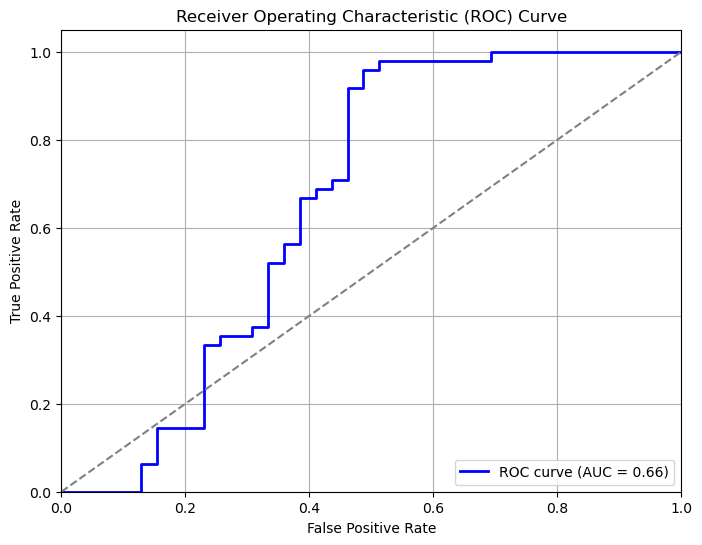

In [314]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Assuming you have already loaded or generated your test data as X_test_scaled and y_test

# Predict scores on the test set
test_scores = model.score_samples(X_test_scaled)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, -test_scores)  # Using negative scores as One-Class SVM's predict function outputs negative scores

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, -test_scores)

# Calculate Area Under ROC curve (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Calculate Area Under Precision-Recall curve (AUC-PR)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()